# Risques Cardio-Vasculaires

## To-Do

''' En vous appuyant sur ces données, Construisez un modèle de Random Forest permettant de prédire
qui sont les sujets à risque !

1. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.

2. Résoudre le cas d’étude présenté ci-dessus avec la librairie Scikit-Learn (exploration des données, préparation des données, modélisation, le test et l’interprétation des résultats).

3. Prédire si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires.

4. comparer avec un KNN

# import librairies

In [144]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

# Data exploration

In [145]:
data = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [146]:
#data['age'] = data['age']//365.25
#data.head()

In [4]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Vizualisation

# Random Forest Model

In [147]:
X = data.drop(['cardio'], axis=1)
y = data['cardio']

In [148]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Without Standard Scaler

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [151]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [152]:
features = ['age','gender','height','weight','ap_hi', 'ap_lo', 'cholesterol','gluc', 'smoke', 'alco','active']

Text(0.5, 0, 'Relative Importance data')

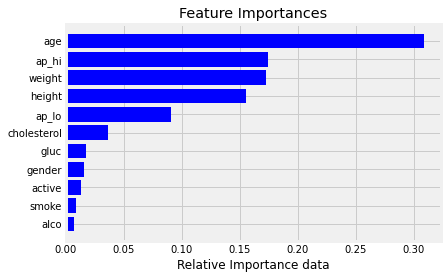

In [153]:
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance data')

In [154]:
y_pred = rf.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7158571428571429


In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



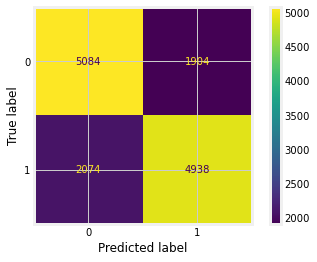

In [157]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(rf,X_test,y_test)

## With Standard Scaler

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [159]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_s,y_train)
y_pred_s = rf1.predict(X_test_s)

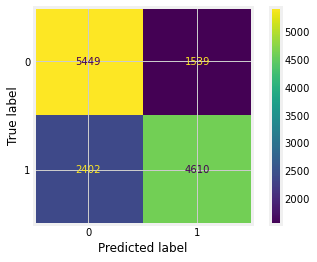

In [160]:
plot_confusion_matrix(rf1,X_test_s,y_test)

In [161]:
print(classification_report(y_test, y_pred_s))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      6988
           1       0.75      0.66      0.70      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



Text(0.5, 0, 'Relative Importance data')

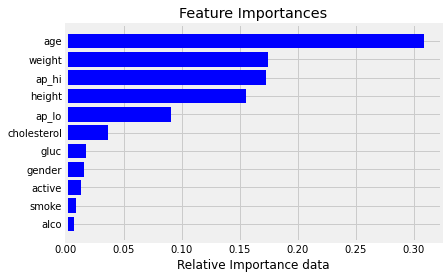

In [162]:
importances1 = rf1.feature_importances_
indices1 = np.argsort(importances1)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices1])
plt.xlabel('Relative Importance data')

## Conclusions:
Selon les analyses effectuées, on remarque que:
- les facteurs qui impactent le plus les risques cardiovasculaires sont:
    1. l'age
    2. le poids
    3. la pression artérielle

-  le Random Forest donne des scores autours de 70%
- le Standard Scaler ne change pas les scores du model dans ce cas de figure


# Predict

Prédire si:
Arthur ->Gender = 2
53 ans -> age = 53
fumeur -> smoke = 1
sportif -> active =1
175 cm -> height = 175
85 kg -> weight = 85
avec un taux de cholestérol au dessus de la normal -> 2
et un taux de glucose normal -> 1
une tension artérielle systolique dans la moyenne
et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, 
est un sujet à risques cardio-vasculaires.

In [164]:
age_Arthur = 53*365
ap_hi_Arthur = round(np.mean(X.ap_hi))
ap_low_Arthur = round(np.percentile(X.ap_lo, 75))

19345

In [167]:
Arthur = [[19345,2,175,85,129,90,2,1,1,0,1]]

In [168]:
Arthur_pred = rf.predict(Arthur) #Random Forest without Standard Scaler
Arthur_pred

array([1])

In [169]:
Arthur_pred_s = rf1.predict(Arthur)#Random Forest with Standard Scaler
Arthur_pred_s

array([1])

In [229]:
y_proba_Arthur = pd.DataFrame(rf.predict_proba(Arthur))
y_proba_Arthur

,0,1
0,0.44,0.56


## Conclusion:
- Selon le Random Forest, le cas d'Arthur présente des risques radiovasculaire avec un pourcentage de 56%

# Grid Search for Random Forest

In [182]:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier()
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [184]:
import warnings
#parametres= {'n_estimators':[1,10,100],'max_features':[1,11],'random_state':[0,42] }
param_grid = {'bootstrap': [True, False],'max_depth': [80, 100],'n_estimators': [10,75, 100]}

warnings.filterwarnings("ignore", category=ConvergenceWarning)

clf = GridSearchCV(estimator=estimator,param_grid=param_grid)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'max_depth': 100, 'n_estimators': 100}


In [186]:
print(round(clf.best_score_,3)) #without Standard Scaler

0.717


In [188]:
clf.fit(X_train_s,y_train) #with Standard Scaler
print(clf.best_params_)

{'bootstrap': True, 'max_depth': 100, 'n_estimators': 100}


In [189]:
print(round(clf.best_score_,3))

0.715


## Conclusions:
- Après l'utilisation du Grid Search, on observe que les paramétres par défaut donnent des résultats optimum. 
- le temps d'éxécution du Grid Search est assez important (de l'ordre de 15 minutes) pour un résultat égal au random Forest classique.

## Comparing with Logistic Regression

In [213]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression().fit(X, y)
logReg.fit(X_train,y_train)

LogisticRegression()

In [214]:
logReg.score(X_train, y_train)

0.6966285714285714

In [215]:
y_pred_log = logReg.predict(X_test)

In [216]:
Arthur_logreg = logReg.predict(Arthur)
Arthur_logreg # Selon la regression logistique Arthur n'est pas une personne à risque

array([0])

In [222]:
y_proba_Arthur = pd.DataFrame(logReg.predict_proba(Arthur))
y_proba_Arthur

,0,1
0,0.540794,0.459206


In [217]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      8688
           1       0.72      0.66      0.69      8812

    accuracy                           0.70     17500
   macro avg       0.70      0.70      0.70     17500
weighted avg       0.70      0.70      0.70     17500



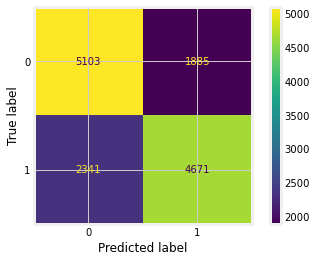

In [201]:
plot_confusion_matrix(logReg,X_test,y_test)

## Conclusion:
- les scores donnés par la régression logistique sont moins bon que ceux données par le Random Forest.
- Selon la Regression logistique, le cas d'Arthur ne présente pas de risques cardiovasculaire avec une probabilité de 54%. 
- La différence de prédiction 

# Random Forest Manuel

In [297]:
x =data[['age','height','weight','ap_hi', 'ap_lo']]

In [298]:
x_test = x.iloc[0:50000,:]
x_train = x.iloc[50000:70000,:]

In [303]:
y_test = y.iloc[:50000]
y_train = y.iloc[50000:]

In [304]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(50000, 5)
(50000,)
(20000, 5)
(20000,)


In [307]:
RF = RandomForestClassifier(n_estimators=10)
RF.fit(x_train,y_train)
y_predict=RF.predict(x_test)

In [308]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.73      0.70     25048
           1       0.70      0.63      0.66     24952

    accuracy                           0.68     50000
   macro avg       0.68      0.68      0.68     50000
weighted avg       0.68      0.68      0.68     50000



In [311]:
Arthur1 =[[19345,2,175,85,129]]
y_pred_Arthur = RF.predict(Arthur1)
y_pred_Arthur

array([1])

In [314]:
y_proba_Arthur1 = pd.DataFrame(RF.predict_proba(Arthur1))
y_proba_Arthur1

,0,1
0,0.4,0.6


In [315]:
y_proba_Arthur #y_proba avec RandomForest et split du SKlearn

,0,1
0,0.44,0.56


## Conclusion:
Le résultat de la prédiction du cas d'Arthur reste le même dans les 2 cas du Random Forest. Cependant, la probabilité qu'il soit malade a passé de 56% (avec un split de sklearn) à 60% (avec un split manuel). 
=> le fait de faire un split manuel nous donne une maitrise sur les données dans le train set et le test set. Dans ce cas, cela nous permet d'amélioerer la qualité des prédictions. 
Egalement, j'ai pris le choix d'utiliser les 5 paramétres qui affectent le plus les risques cardiovasculaire. j'ai fait ce choix en se basant sur le graphique: "features importance".

Néanmoins, étant donnée que la prédiction n'est pas catégorique, il est recommandé de demander des analyses complémentaires dans le cas du patient Arthur.